In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [2]:
sale_df = pd.read_csv('black_friday.csv')
sale_df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [3]:
sale_df.shape

(550068, 12)

### Quick View 

In [4]:
from pandas_profiling import ProfileReport
profile = ProfileReport(sale_df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
sale_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
sale_df.describe().T

count          mean          std        min        25%  \
User_ID             550068.0  1.003029e+06  1727.591586  1000001.0  1001516.0   
Occupation          550068.0  8.076707e+00     6.522660        0.0        2.0   
Marital_Status      550068.0  4.096530e-01     0.491770        0.0        0.0   
Product_Category_1  550068.0  5.404270e+00     3.936211        1.0        1.0   
Product_Category_2  376430.0  9.842329e+00     5.086590        2.0        5.0   
Product_Category_3  166821.0  1.266824e+01     4.125338        3.0        9.0   
Purchase            550068.0  9.263969e+03  5023.065394       12.0     5823.0   

                          50%        75%        max  
User_ID             1003077.0  1004478.0  1006040.0  
Occupation                7.0       14.0       20.0  
Marital_Status            0.0        1.0        1.0  
Product_Category_1        5.0        8.0       20.0  
Product_Category_2        9.0       15.0       18.0  
Product_Category_3       14.0       16.0       18.0  
Purchase               8047.0    12054.0    23961.0

In [8]:
sale_df.duplicated().sum()

0

In [9]:
# Categorical features
objects = [f for f in sale_df.columns if sale_df.dtypes[f] == 'object']
print('Non-numeric features: ', objects)

# Categorical features in objects
i = 1
for obj in objects:
    print(f'{i}. {obj} \t {len(sale_df[obj].unique())} unique values, {sale_df[obj].unique()}')
    i += 1

Non-numeric features:  ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
1. Product_ID 	 3631 unique values, ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
2. Gender 	 2 unique values, ['F' 'M']
3. Age 	 7 unique values, ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
4. City_Category 	 3 unique values, ['A' 'C' 'B']
5. Stay_In_Current_City_Years 	 5 unique values, ['2' '4+' '3' '1' '0']


In [10]:
# Numerical features
numerics = [f for f in sale_df.columns if sale_df.dtypes[f] != 'object']
print('Numeric features: ', numerics)

# Numerical features in numerics
i = 1
for num in numerics:
    print(f'{i}. {num} \t {len(sale_df[num].unique())} unique values')
    i += 1

Numeric features:  ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
1. User_ID 	 5891 unique values
2. Occupation 	 21 unique values
3. Marital_Status 	 2 unique values
4. Product_Category_1 	 20 unique values
5. Product_Category_2 	 18 unique values
6. Product_Category_3 	 16 unique values
7. Purchase 	 18105 unique values


### Features:
- Input: <> Purchase
- Outputs: Purchase
- Type of Variables:
    Categorical: <> purchas
    
    Numeric: purchase

In [11]:
# Categorical features
categorical_vars = ["Gender",'Age', "City_Category",
                    "Marital_Status","Product_Category_1",'Product_Category_2',
                   'Product_Category_3',
                    "Stay_In_Current_City_Years",
                    'Occupation',
                   ]
input_categorical_vars = ["Gender",'Age', "City_Category",
                    "Marital_Status","Product_Category_1",'Product_Category_2',
                   'Product_Category_3',
                          "Stay_In_Current_City_Years",
                         'Occupation']
continuous_vars = ["Purchase"]

### Univariate Analysis

In [13]:
# Univariate analysis
# Univariate analysis
def analys_univariate(data, col,
                      types):  # dataframe, string, cate or continuous (df,'LotArea', 'cont'):
    if types == 'cont':
        print('\nfundamental statistics', col)
        print('-------------------------------------------------')
        print('Number of variables', col, ': ', len(data[col].unique()), '\t',
              data[col].unique() if len(data[col].unique()) < 100 else '')
        print("Max = ", data[col].max(), "\tMin = ", data[col].min())
        print("Range = ", data[col].max() - data[col].min())
        print("Mean = ", data[col].mean())
        print("Median = ", np.median(data[col]))
        print("Mode = ", data[col].mode().values)
        print('--------------------------')
        print("Variance = ", round(np.var(data[col]), 3))
        print("Std = ", round(np.std(data[col]), 3))
        print('--------------------------')
        ##########################################
        Q1 = np.quantile(data[col].dropna(), 0.25)
        Q3 = np.quantile(data[col].dropna(), 0.75)
        IQR = Q3 - Q1
        print('Q1: ', Q1, '\Q3: ', Q3)
        print('IQR: ', IQR)
        n_O_upper = data[data[col] > (Q3 + 1.5 * IQR)].shape[0]
        n_O_lower = data[data[col] < (Q1 - 1.5 * IQR)].shape[0]
        print('Lower Outliers:', n_O_lower)
        print('Upper Outliers:', n_O_upper)
        print('Oulier accounted for: ', round((n_O_lower + n_O_upper) / data.shape[0] * 100, 3), '%')
        print('--------------------------')
        ##########################################
        skew = data[col].skew()
        if skew > 0:
            print('Right sknewed distribution,  skew =', skew)
        elif skew < 0:
            print('Left sknewed distribution, skew =', skew)
        else:
            print('Symetric,  skew =', skew)
        kurt = data[col].kurtosis()
        if kurt > 0:
            print('Leptokurtic or heavy-tailed distribution, kurt =', kurt)
        elif kurt < 0:
            print('Platykurtic or short-tailed distribution, kurt =', kurt)
        else:
            print('Mesokurtic, kurt =', kurt)
        ##########################################
        print('--------------------------')
        print('Visualization')
        f = plt.figure(figsize=(8, 6), tight_layout=True)
        plt.subplot(211)
        plt.title('displot grahp ' + str(col))
        sns.distplot(data[col])
        plt.subplot(212)
        plt.title('boxplot grahp ' + str(col))
        sns.boxplot(x=data[col])
        plt.show()
    elif types == 'cate':  ##(df,'LotArea', 'cont')
        print(f'\ndata of {col} :')
        print('-------------------------------------------------')
        print('with', len(data[col].unique()), 'categorical variable', col, ': \n',
              data[col].unique() if len(data[col].unique()) < 100 else '')
        print('table and percentage: ', col)
        counts = data[col].value_counts()
        percent = data[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
        print(pd.DataFrame({'counts': counts, 'percentage': percent}))
        f = plt.figure(figsize=(8, 6), tight_layout=True)
        plt.title('grahps:  ' + str(col))
        sns.set()
        counts.plot.bar()
        plt.xticks(rotation=45)
        plt.show()



data of Gender :
-------------------------------------------------
with 2 categorical variable Gender : 
 ['F' 'M']
table and percentage:  Gender
   counts percentage
M  414259     75.31%
F  135809     24.69%


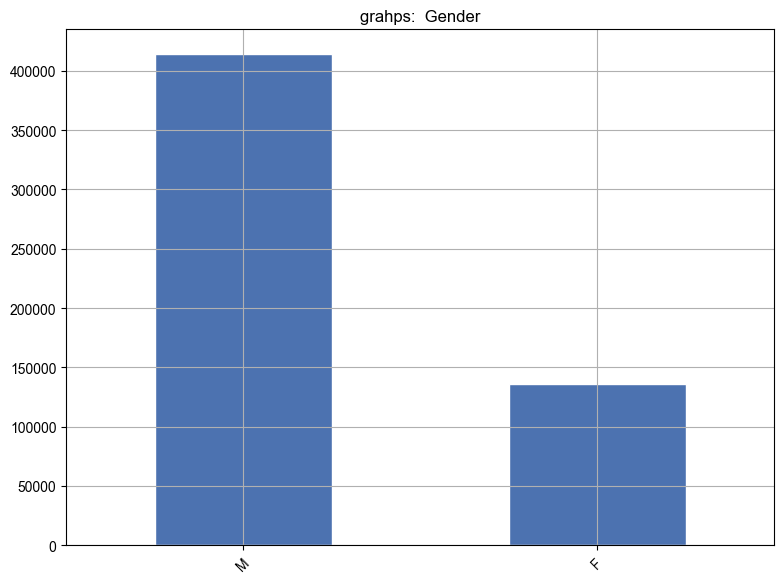


data of Age :
-------------------------------------------------
with 7 categorical variable Age : 
 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
table and percentage:  Age
       counts percentage
26-35  219587     39.92%
36-45  110013      20.0%
18-25   99660     18.12%
46-50   45701      8.31%
51-55   38501       7.0%
55+     21504      3.91%
0-17    15102      2.75%


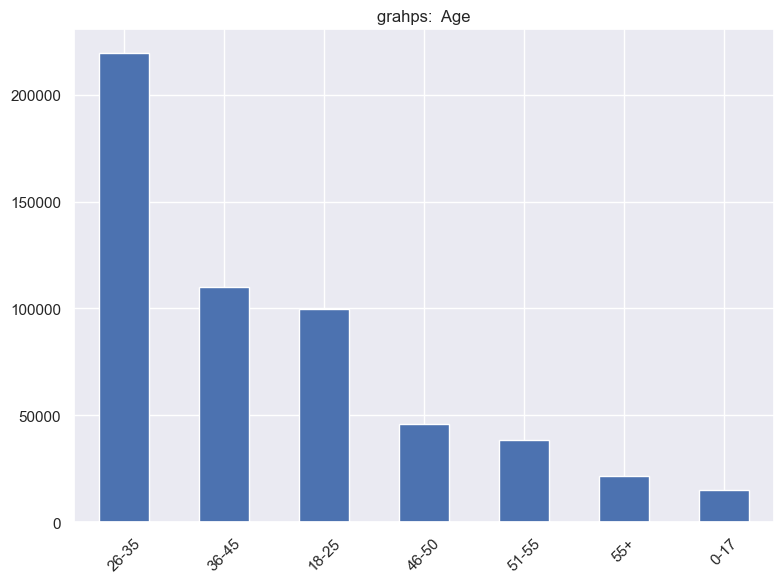


data of City_Category :
-------------------------------------------------
with 3 categorical variable City_Category : 
 ['A' 'C' 'B']
table and percentage:  City_Category
   counts percentage
B  231173     42.03%
C  171175     31.12%
A  147720     26.85%


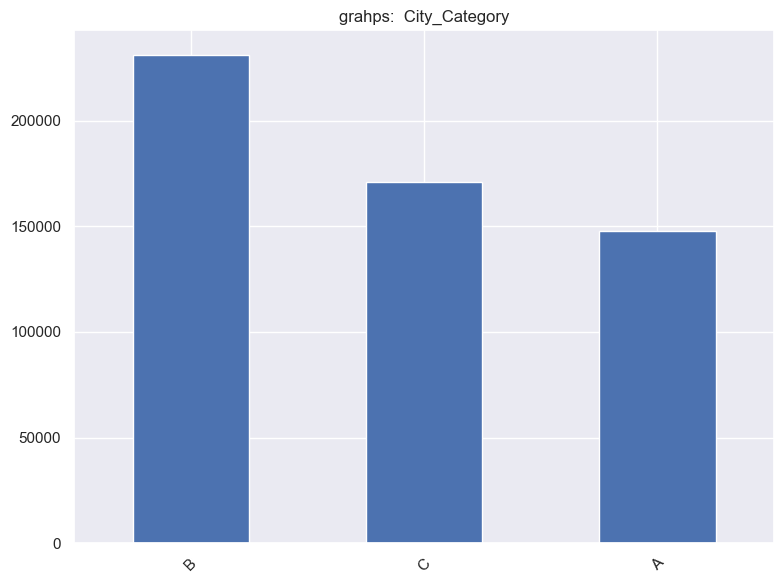


data of Marital_Status :
-------------------------------------------------
with 2 categorical variable Marital_Status : 
 [0 1]
table and percentage:  Marital_Status
   counts percentage
0  324731     59.03%
1  225337     40.97%


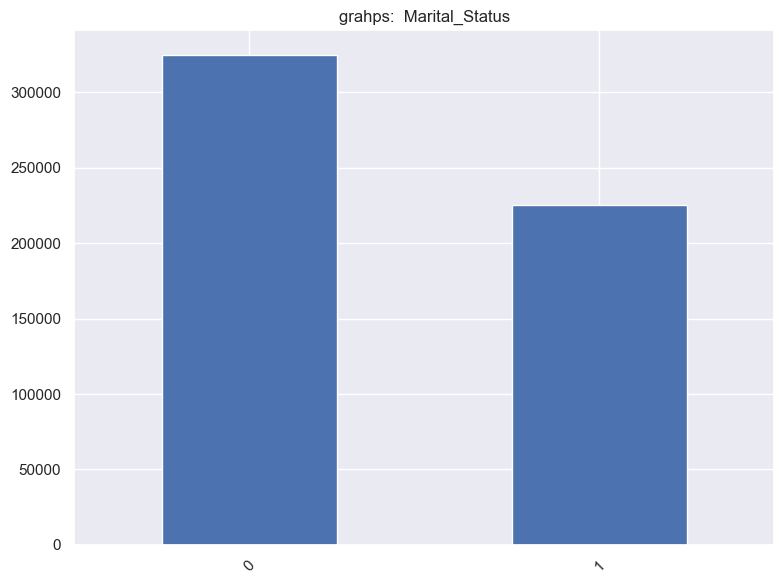


data of Product_Category_1 :
-------------------------------------------------
with 20 categorical variable Product_Category_1 : 
 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
table and percentage:  Product_Category_1
    counts percentage
5   150933     27.44%
1   140378     25.52%
8   113925     20.71%
11   24287      4.42%
2    23864      4.34%
6    20466      3.72%
3    20213      3.67%
4    11753      2.14%
16    9828      1.79%
15    6290      1.14%
13    5549      1.01%
10    5125      0.93%
12    3947      0.72%
7     3721      0.68%
18    3125      0.57%
20    2550      0.46%
19    1603      0.29%
14    1523      0.28%
17     578      0.11%
9      410      0.07%


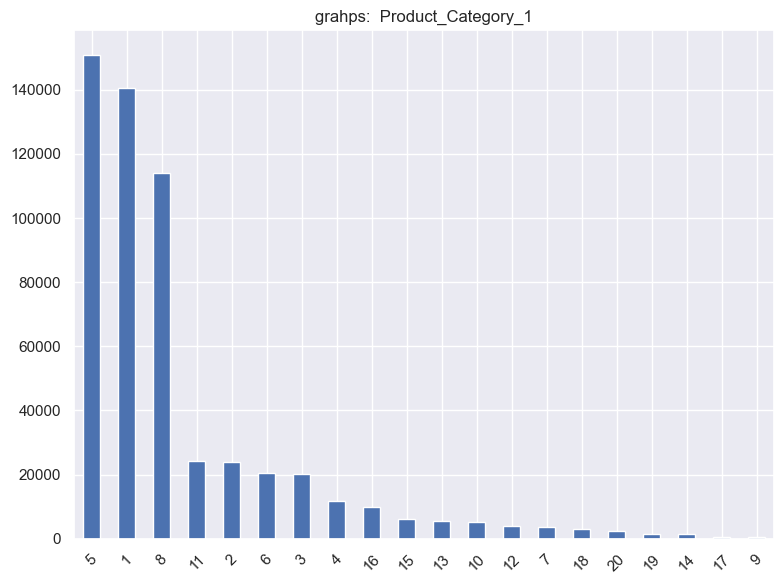


data of Product_Category_2 :
-------------------------------------------------
with 18 categorical variable Product_Category_2 : 
 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
table and percentage:  Product_Category_2
      counts percentage
8.0    64088     17.03%
14.0   55108     14.64%
2.0    49217     13.07%
16.0   43255     11.49%
15.0   37855     10.06%
5.0    26235      6.97%
4.0    25677      6.82%
6.0    16466      4.37%
11.0   14134      3.75%
17.0   13320      3.54%
13.0   10531       2.8%
9.0     5693      1.51%
12.0    5528      1.47%
10.0    3043      0.81%
3.0     2884      0.77%
18.0    2770      0.74%
7.0      626      0.17%


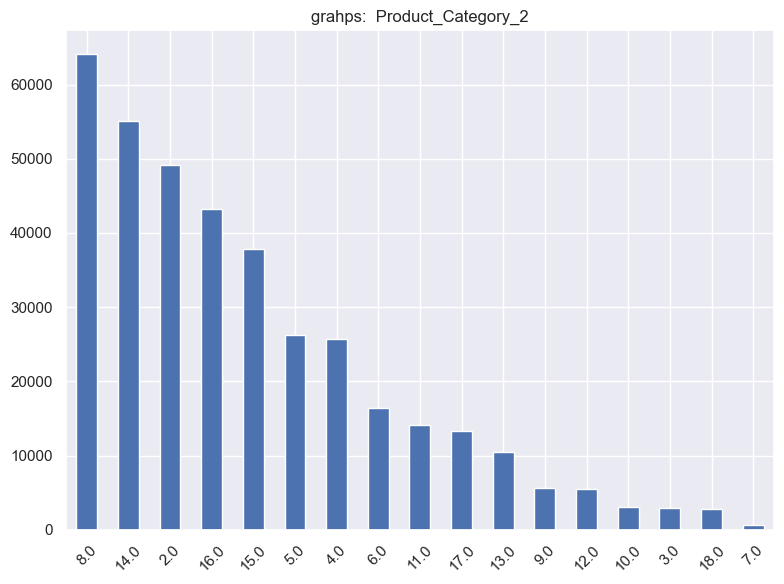


data of Product_Category_3 :
-------------------------------------------------
with 16 categorical variable Product_Category_3 : 
 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
table and percentage:  Product_Category_3
      counts percentage
16.0   32636     19.56%
15.0   28013     16.79%
14.0   18428     11.05%
17.0   16702     10.01%
5.0    16658      9.99%
8.0    12562      7.53%
9.0    11579      6.94%
12.0    9246      5.54%
13.0    5459      3.27%
6.0     4890      2.93%
18.0    4629      2.77%
4.0     1875      1.12%
11.0    1805      1.08%
10.0    1726      1.03%
3.0      613      0.37%


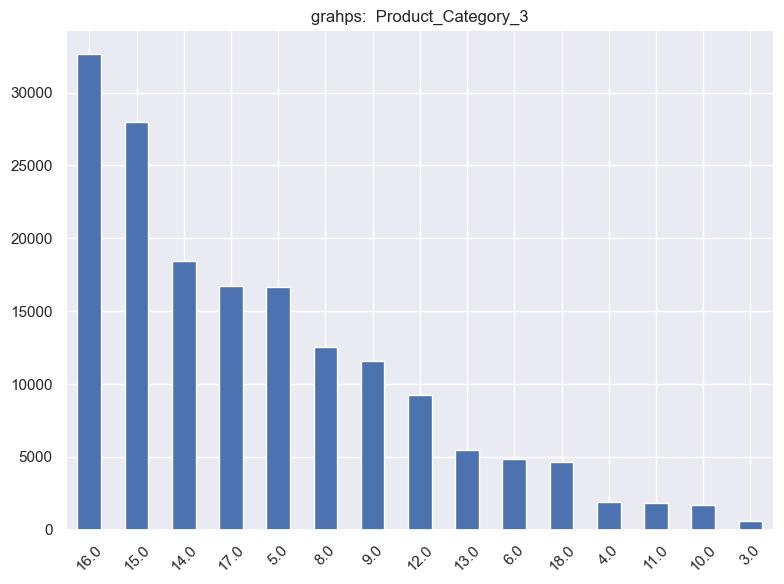


data of Stay_In_Current_City_Years :
-------------------------------------------------
with 5 categorical variable Stay_In_Current_City_Years : 
 ['2' '4+' '3' '1' '0']
table and percentage:  Stay_In_Current_City_Years
    counts percentage
1   193821     35.24%
2   101838     18.51%
3    95285     17.32%
4+   84726      15.4%
0    74398     13.53%


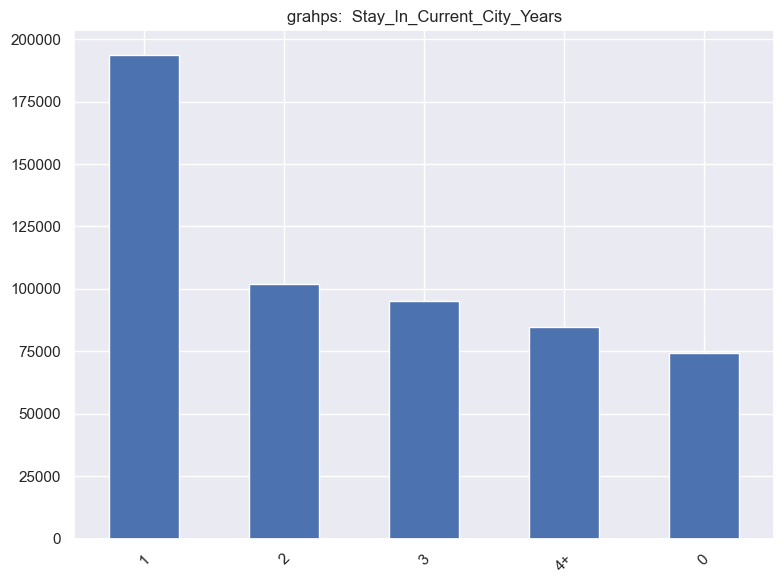


data of Occupation :
-------------------------------------------------
with 21 categorical variable Occupation : 
 [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
table and percentage:  Occupation
    counts percentage
4    72308     13.15%
0    69638     12.66%
7    59133     10.75%
1    47426      8.62%
17   40043      7.28%
20   33562       6.1%
12   31179      5.67%
14   27309      4.96%
2    26588      4.83%
16   25371      4.61%
6    20355       3.7%
3    17650      3.21%
10   12930      2.35%
5    12177      2.21%
15   12165      2.21%
11   11586      2.11%
19    8461      1.54%
13    7728       1.4%
18    6622       1.2%
9     6291      1.14%
8     1546      0.28%


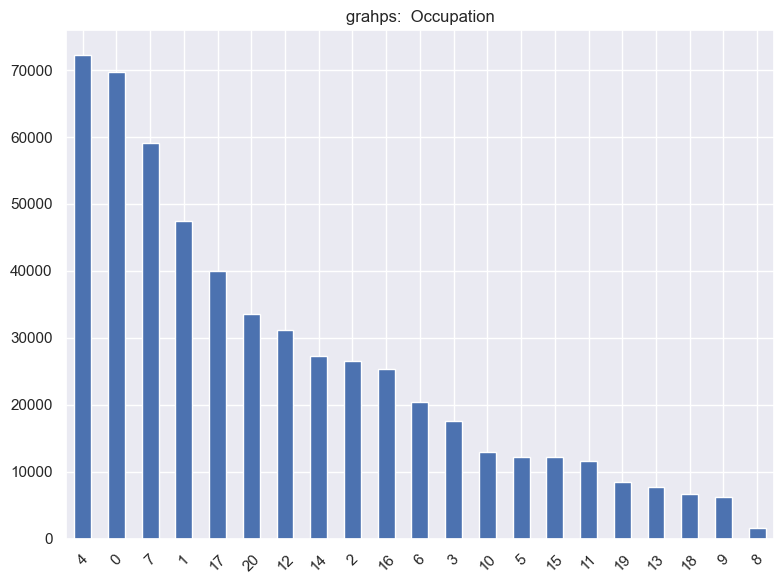

In [14]:
for col in categorical_vars:
    analys_univariate(sale_df,col,'cate')   


fundamental statistics Purchase
-------------------------------------------------
Number of variables Purchase :  18105 	 
Max =  23961 	Min =  12
Range =  23949
Mean =  9263.968712959126
Median =  8047.0
Mode =  [7011]
--------------------------
Variance =  25231140.081
Std =  5023.061
--------------------------
Q1:  5823.0 \Q3:  12054.0
IQR:  6231.0
Lower Outliers: 0
Upper Outliers: 2677
Oulier accounted for:  0.487 %
--------------------------
Right sknewed distribution,  skew = 0.6001400037087128
Platykurtic or short-tailed distribution, kurt = -0.3383775655851702
--------------------------
Visualization


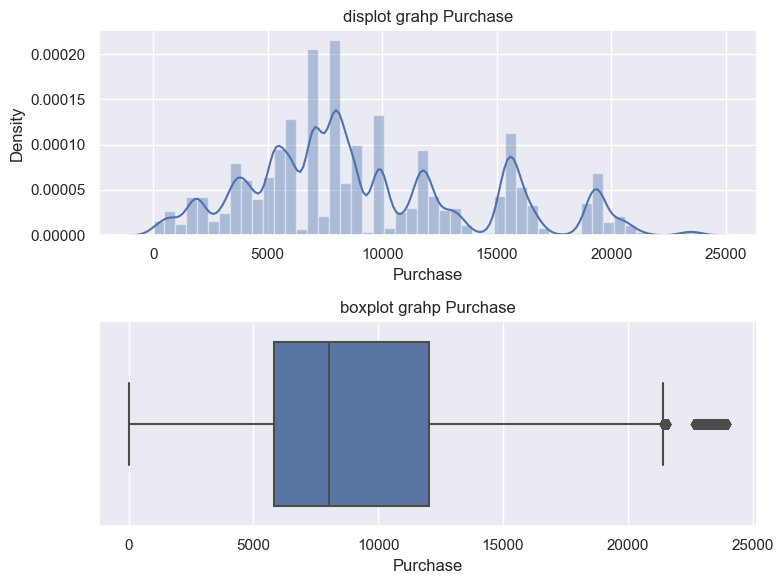

In [15]:
for col in continuous_vars:
    analys_univariate(sale_df,col,'cont')

### Multivariate analysis

In [16]:
# Categorical - Categorical
from scipy.stats import chi2_contingency, chi2

#Chi-square Test: H0 - Independent
chi2_test_df = pd.DataFrame(index=categorical_vars, columns=categorical_vars)
alpha = 0.05
#Chi-square Test: H0 - Independent
chi2_test_df = pd.DataFrame(index=categorical_vars, columns=categorical_vars)
for i in range(len(categorical_vars)):
    for j in range(i + 1, len(categorical_vars)):
        table = pd.crosstab(sale_df[categorical_vars[i]], sale_df[categorical_vars[j]])
        stat, p, dof, expected = chi2_contingency(table)
        #print('\n*** significance = %.3f, p_value = %.3f' %(alpha,p))
        if p < alpha:
            #print(categorical_var[i],'&',categorical_var[j],'==> Dependent (Reject H0)')
            chi2_test_df.loc[categorical_vars[i], categorical_vars[j]] = 'Dependent'
        else:
            #print(categorical_var[i],'&',categorical_var[j],'==> Independent (Fail to Reject H0)')
            chi2_test_df.loc[categorical_vars[i], categorical_vars[j]] = 'Independent'
chi2_test_df

Gender        Age City_Category Marital_Status  \
Gender                        NaN  Dependent     Dependent      Dependent   
Age                           NaN        NaN     Dependent      Dependent   
City_Category                 NaN        NaN           NaN      Dependent   
Marital_Status                NaN        NaN           NaN            NaN   
Product_Category_1            NaN        NaN           NaN            NaN   
Product_Category_2            NaN        NaN           NaN            NaN   
Product_Category_3            NaN        NaN           NaN            NaN   
Stay_In_Current_City_Years    NaN        NaN           NaN            NaN   
Occupation                    NaN        NaN           NaN            NaN   

                           Product_Category_1 Product_Category_2  \
Gender                              Dependent          Dependent   
Age                                 Dependent          Dependent   
City_Category                       Dependent          Dependent   
Marital_Status                      Dependent          Dependent   
Product_Category_1                        NaN          Dependent   
Product_Category_2                        NaN                NaN   
Product_Category_3                        NaN                NaN   
Stay_In_Current_City_Years                NaN                NaN   
Occupation                                NaN                NaN   

                           Product_Category_3 Stay_In_Current_City_Years  \
Gender                              Dependent                  Dependent   
Age                                 Dependent                  Dependent   
City_Category                       Dependent                  Dependent   
Marital_Status                      Dependent                  Dependent   
Product_Category_1                  Dependent                  Dependent   
Product_Category_2                  Dependent                  Dependent   
Product_Category_3                        NaN                  Dependent   
Stay_In_Current_City_Years                NaN                        NaN   
Occupation                                NaN                        NaN   

                           Occupation  
Gender                      Dependent  
Age                         Dependent  
City_Category               Dependent  
Marital_Status              Dependent  
Product_Category_1          Dependent  
Product_Category_2          Dependent  
Product_Category_3          Dependent  
Stay_In_Current_City_Years  Dependent  
Occupation                        NaN


Analysis between continuous Purchase and categorical variables
From ANOVA table, alpha: 0.05, Categorical variables have dependent relationship with Purchase
['Gender', 'Age', 'City_Category', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Stay_In_Current_City_Years', 'Occupation']


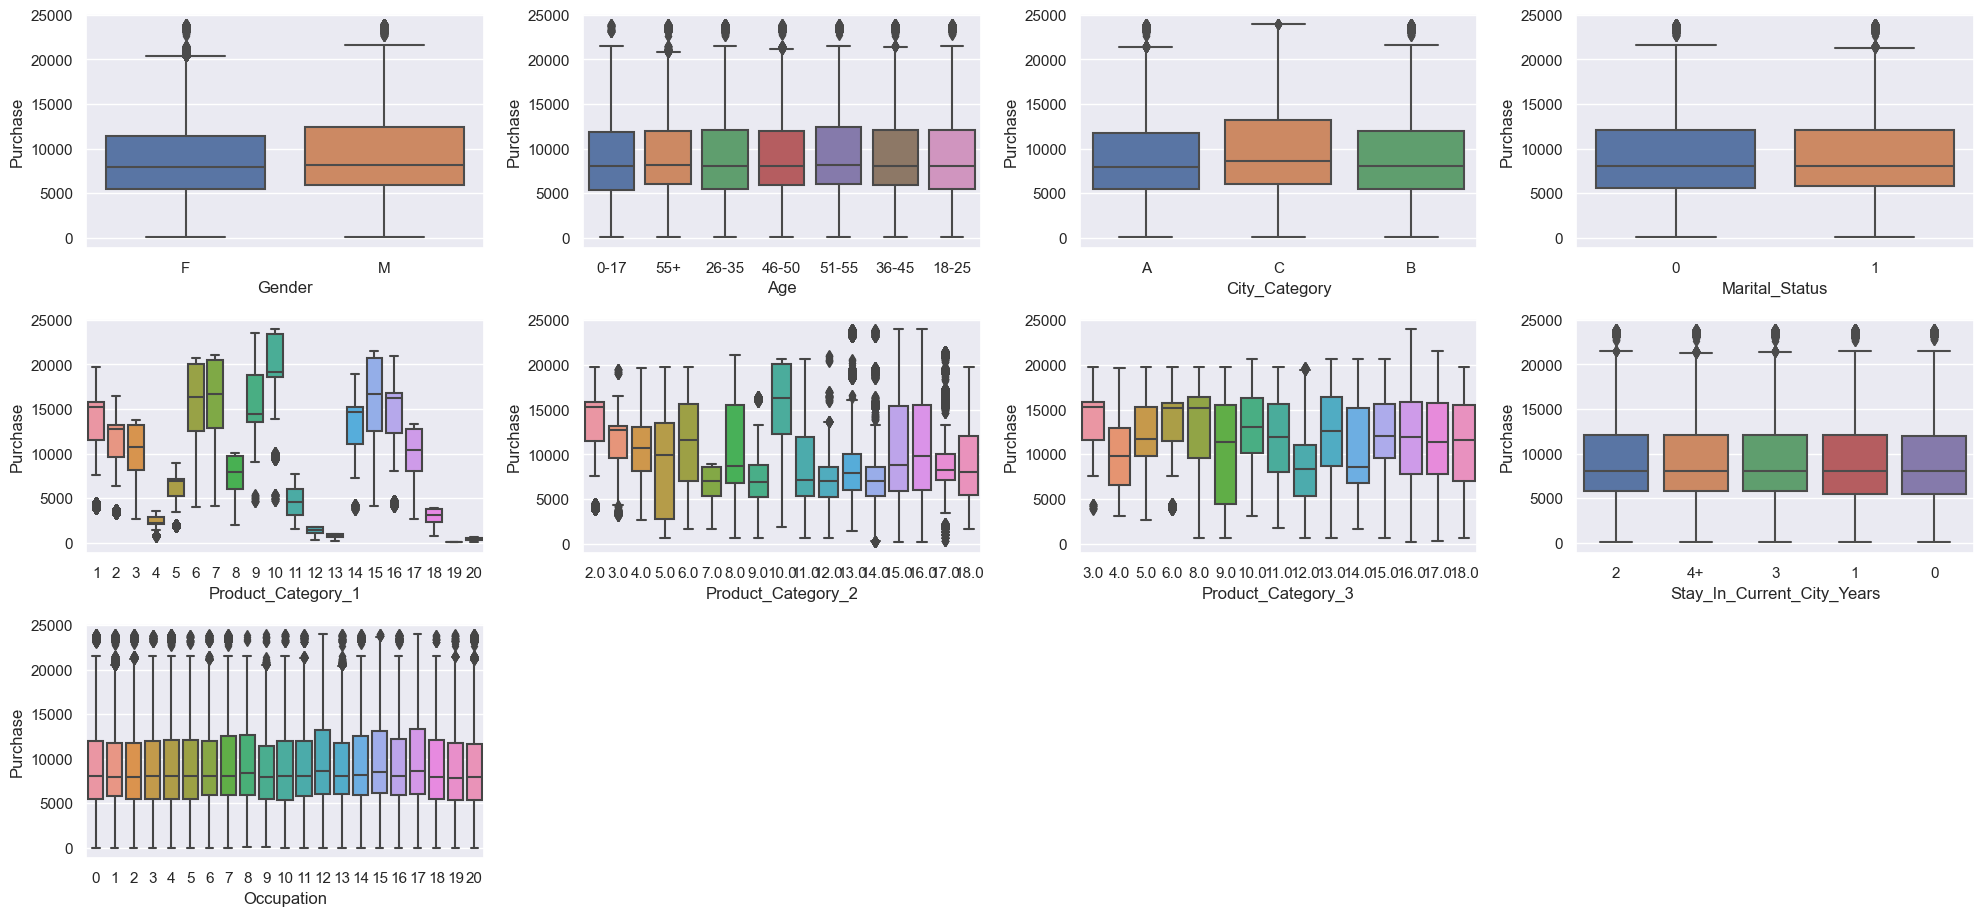

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for j in continuous_vars:
    depend = []
    print(f'\nAnalysis between continuous {j} and categorical variables')
    plt.figure(figsize=(20, 18))
    for i in range(1, len(categorical_vars) + 1):
        df_melt = sale_df[[categorical_vars[i - 1], j]]
        plt.subplot(6, 4, i)
        sns.boxplot(data=df_melt, x=categorical_vars[i - 1], y=j)
        ####Phân tích theo Anova table, với hệ số alpha = 0.05
        alpha = 0.05
        df_temp = sale_df[[j, categorical_vars[i - 1]]]
        df_temp.columns = ['cont_data', 'cate_data']
        bieuthuc = 'cont_data ~ C(cate_data)'
        model = ols(bieuthuc, data=df_temp).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        if anova_table.values[0, 3] < alpha:
            depend.append(categorical_vars[i - 1])
        i += 1
    print(
        'From ANOVA table, alpha: 0.05, Categorical variables have dependent relationship with',
        j)
    print(depend)
    plt.tight_layout()
    plt.show()

## Preprocessing

### Mising Value

In [18]:
### duplicat the data before we check missing value
df_copy = sale_df.copy()

In [19]:
print ("Shape of Original df:{}".format(sale_df.shape))
print ("Shape of Copy df_copy:{}".format(df_copy.shape))

Shape of Original df:(550068, 12)
Shape of Copy df_copy:(550068, 12)


In [20]:
## drop NaN value
df_copy.dropna(inplace=True)

In [21]:
## check the original data and drop NA data
print ("Shape of Original df:{}".format(sale_df.shape))
print ("Shape of Copy df_copy:{}".format(df_copy.shape))

Shape of Original df:(550068, 12)
Shape of Copy df_copy:(166821, 12)


In [22]:
print ("Propotion of missing values in df :{0:.2f}".format((sale_df.shape[0] - df_copy.shape[0])/sale_df.shape[0]))

Propotion of missing values in df :0.70


Comments:
- we should not eliminate missing values, because if we do that 70% of dataset will be excluded from the original dataset.

In [23]:
### Use skleanr to replace Nan Value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
sale_df.iloc[:,9:11] = imputer.fit_transform(sale_df.iloc[:,9:11])

In [24]:
#Check Nan value again
sale_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

<AxesSubplot: >

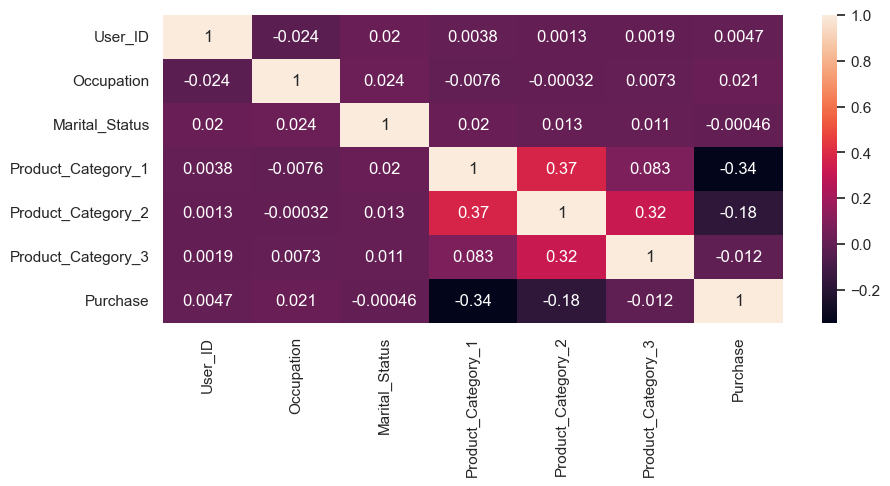

In [25]:
plt.figure(figsize=(10, 4))
sns.heatmap(sale_df.corr(), annot=True)

###
- User_ID; Marital_Status, Occupation are very low correlations
- can be eliminated


### eliminate unncessary features


In [26]:
sale_df.drop(['User_ID','Product_ID','Marital_Status','Occupation'],axis = 1, inplace = True)

### Others

In [27]:
# eliminate '+'
sale_df['Age']=(sale_df['Age'].str.strip('+'))
sale_df['Stay_In_Current_City_Years']=(sale_df['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [28]:
### check again
print('Age:', sale_df['Age'].unique())
print('Stay inCurrent city Year:', sale_df['Stay_In_Current_City_Years'].unique())

Age: ['0-17' '55' '26-35' '46-50' '51-55' '36-45' '18-25']
Stay inCurrent city Year: [2. 4. 3. 1. 0.]


### Save as new dataset

In [29]:
sale_df.to_csv("sale_df.csv", index = False)